**Develop a predictive model to accurately forecast hourly traffic volumes at different road junctions based on historical traffic data**




IMPORT ESSENTIAL LIBRARIES


In [ ]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

IMPORT DATA

In [ ]:
# Load the traffic dataset
df1 = pd.read_csv('/content/Dataset_Uber Traffic.csv')

In [ ]:
df1.shape

(48120, 4)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
df1.head()

,DateTime,Junction,Vehicles,ID
0,01-11-2015 00:00,1,15,20151101001
1,01-11-2015 01:00,1,13,20151101011
2,01-11-2015 02:00,1,10,20151101021
3,01-11-2015 03:00,1,7,20151101031
4,01-11-2015 04:00,1,9,20151101041


In [ ]:
df2= pd.read_csv("/content/weather_data.csv")

In [ ]:
df2.shape

(116136, 6)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116136 entries, 0 to 116135
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   DateTime       116136 non-null  object 
 1   humidity       116136 non-null  int64  
 2   precipitation  116136 non-null  float64
 3   temperature    116136 non-null  int64  
 4   visibility     116136 non-null  int64  
 5   windspeed      116136 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.3+ MB


In [ ]:
df2.describe()

,humidity,precipitation,temperature,visibility,windspeed
count,116136.000000,116136.000000,116136.000000,116136.000000,116136.000000
mean,57.646001,0.231727,25.304720,9.409899,9.397663
std,25.316012,0.802657,4.659629,1.593393,4.775019
min,4.000000,0.000000,11.000000,0.000000,0.000000
25%,36.000000,0.000000,22.000000,10.000000,6.000000
50%,58.000000,0.000000,24.000000,10.000000,9.000000
75%,82.000000,0.100000,28.000000,10.000000,12.000000
max,100.000000,25.700000,43.000000,10.000000,40.000000


In [ ]:
df2.head()

,DateTime,humidity,precipitation,temperature,visibility,windspeed
0,12/11/2008 0:00,72,0.0,18,10,5
1,12/11/2008 1:00,72,0.0,19,10,4
2,12/11/2008 2:00,72,0.0,18,10,4
3,12/11/2008 3:00,72,0.0,18,10,4
4,12/11/2008 4:00,68,0.0,20,10,4


Convert DateTime Columns to Proper Format

In [ ]:
df1['DateTime'] = pd.to_datetime(df1['DateTime'], format='%d-%m-%Y %H:%M')

In [ ]:
df2['DateTime'] = pd.to_datetime(df2['DateTime'], format='%m/%d/%Y %H:%M')


Check and Handle Missing Values

In [ ]:
"Traffic Missing:\n", df1.isnull().sum()

('Traffic Missing:\n',
 DateTime    0
 Junction    0
 Vehicles    0
 ID          0
 dtype: int64)

In [ ]:
"Weather Missing:\n", df2.isnull().sum()

('Weather Missing:\n',
 DateTime         0
 humidity         0
 precipitation    0
 temperature      0
 visibility       0
 windspeed        0
 dtype: int64)

In [ ]:
df1.fillna(0, inplace=True)


In [ ]:
df2.fillna(df2.mean(), inplace=True)

Remove Duplicates

In [ ]:
traffic_df = df1.drop_duplicates()



In [ ]:
weather_df = df2.drop_duplicates()

In [ ]:
traffic_df.dtypes


,0
DateTime,datetime64[ns]
Junction,int64
Vehicles,int64
ID,int64


In [ ]:
weather_df.dtypes

,0
DateTime,datetime64[ns]
humidity,int64
precipitation,float64
temperature,int64
visibility,int64
windspeed,int64


MERGE Traffic and Weather

In [ ]:
merged_df = pd.merge(traffic_df, weather_df, on='DateTime', how='left')


In [ ]:
merged_df.head()

,DateTime,Junction,Vehicles,ID,humidity,precipitation,temperature,visibility,windspeed
0,2015-11-01 00:00:00,1,15,20151101001,64,0.0,22,10,8
1,2015-11-01 01:00:00,1,13,20151101011,66,0.0,22,10,7
2,2015-11-01 02:00:00,1,10,20151101021,68,0.0,22,10,7
3,2015-11-01 03:00:00,1,7,20151101031,70,0.0,21,10,6
4,2015-11-01 04:00:00,1,9,20151101041,67,0.0,21,10,8


In [ ]:
merged_df.to_csv('merged_traffic_weather.csv', index=False)

In [ ]:
traffic_df.set_index('DateTime', inplace=True)
hourly_traffic = traffic_df.groupby(['Junction', pd.Grouper(freq='H')])['Vehicles'].sum().reset_index()


Normalize or Standardize the Data

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(merged_df[['Vehicles', 'humidity', 'precipitation', 'temperature', 'visibility', 'windspeed']])
scaled_df = pd.DataFrame(scaled_data, columns=['Vehicles', 'humidity', 'precipitation', 'temperature', 'visibility', 'windspeed'])


In [ ]:
merged_df_scaled = pd.concat([merged_df[['DateTime', 'Junction']], scaled_df], axis=1)


 Time-based Features


In [ ]:
 # Generate hour, day of week, month, and weekend indicator
merged_df['hour'] = merged_df['DateTime'].dt.hour
merged_df['day_of_week'] = merged_df['DateTime'].dt.dayofweek  # Monday=0
merged_df['month'] = merged_df['DateTime'].dt.month
merged_df['is_weekend'] = merged_df['day_of_week'].isin([5, 6]).astype(int)


Lag Features (Temporal Dependencies)

In [ ]:
# Sort data for each Junction
merged_df = merged_df.sort_values(['Junction', 'DateTime'])

# Lag traffic values by 1 hour and 24 hours
merged_df['lag_1h'] = merged_df.groupby('Junction')['Vehicles'].shift(1)
merged_df['lag_24h'] = merged_df.groupby('Junction')['Vehicles'].shift(24)

# Remove rows with missing values after lagging
merged_df.dropna(inplace=True)


Correlation-Based Feature Importance

In [ ]:
# Correlation with target 'Vehicles'
correlation_matrix = merged_df.corr(numeric_only=True)['Vehicles'].sort_values(ascending=False)
print(correlation_matrix)


Vehicles         1.000000
lag_1h           0.970122
lag_24h          0.905146
ID               0.227275
hour             0.220167
temperature      0.126269
windspeed        0.093690
precipitation    0.016741
humidity        -0.011154
visibility      -0.011848
month           -0.021901
day_of_week     -0.124124
is_weekend      -0.148629
Junction        -0.614193
Name: Vehicles, dtype: float64


Tree-Based Feature Importance (Random Forest)
python
Copy
Edit


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select features (drop columns not needed for model)
feature_cols = ['humidity', 'precipitation', 'temperature', 'visibility', 'windspeed',
                'hour', 'day_of_week', 'month', 'is_weekend', 'lag_1h', 'lag_24h']

X = merged_df[feature_cols]
y = merged_df['Vehicles']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)
feature_importance


,0
lag_1h,0.941836
lag_24h,0.017432
hour,0.014131
humidity,0.006081
windspeed,0.004791
temperature,0.004593
day_of_week,0.004189
month,0.003436
precipitation,0.001647
visibility,0.000978


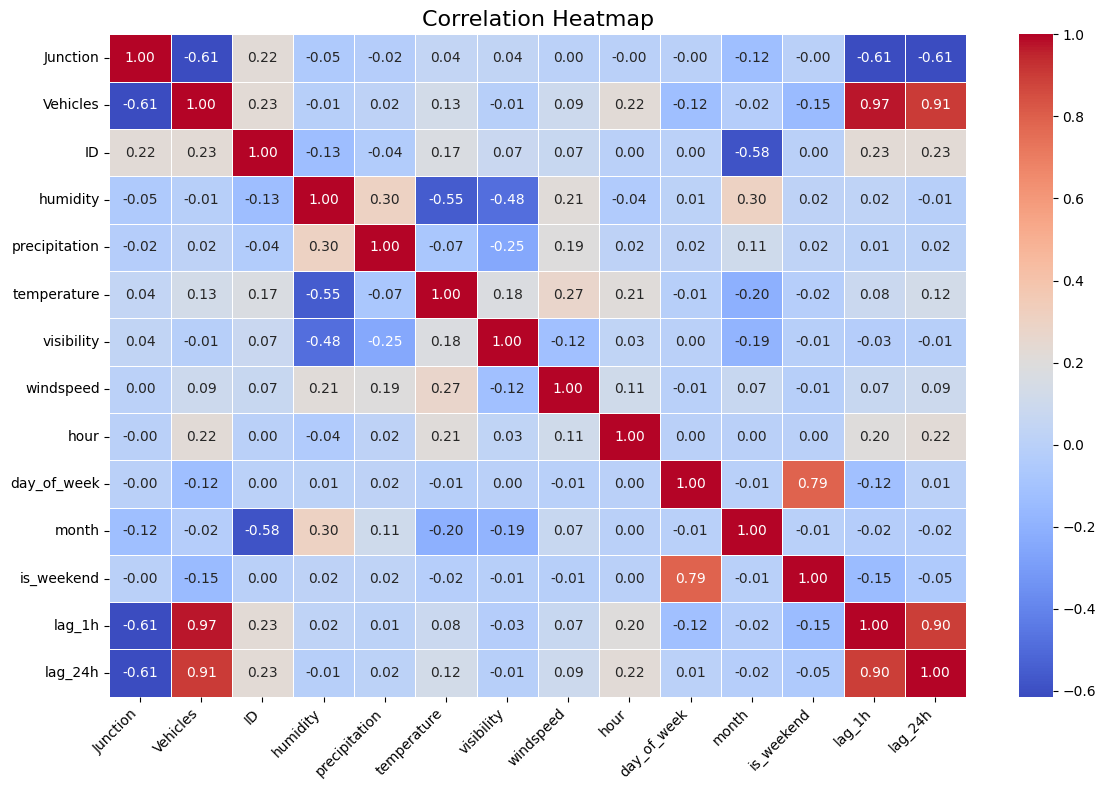

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = merged_df.corr(numeric_only=True)

# Set figure size and plot
plt.figure(figsize=(12, 8))  # Bigger size
sns.heatmap(corr,
            annot=True,       # Show values
            fmt=".2f",         # Format floats
            cmap="coolwarm",   # Color map
            linewidths=0.5,    # Grid lines
            linecolor='white',
            annot_kws={"size": 10})  # Font size

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Prepare Your Data

In [ ]:
# Feature engineering (assuming these already exist)
features = ['hour', 'day_of_week', 'month', 'is_weekend', 'lag_1h', 'lag_24h']
X = merged_df[features]
y = merged_df['Vehicles']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Time Series Train/Test Split

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

# Use 5-split time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)


model 1 Gradient Boosting with Grid Search

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(gbr, param_grid, cv=tscv, scoring='neg_root_mean_squared_error')
grid_search.fit(X_scaled, y)

print("Best Parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best RMSE: 5.133107817301466


Model 2: LSTM (Deep Learning)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Reshape for LSTM: [samples, timesteps, features]
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(1, X_scaled.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_lstm, y, epochs=10, batch_size=32)


Epoch 1/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 450.6529
Epoch 2/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 24.5318
Epoch 3/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 20.0539
Epoch 4/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 19.4675
Epoch 5/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 19.0152
Epoch 6/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 17.8452
Epoch 7/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 17.2528
Epoch 8/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 17.7205
Epoch 9/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 18.1758
Epoch 10/10
1501/1501 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 17.6593


Model 3: ARIMA (for Univariate Forecasting)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Use only the 'Vehicles' column
arima_model = ARIMA(merged_df['Vehicles'], order=(1, 1, 1))  # adjust (p,d,q)
arima_result = arima_model.fit()
print(arima_result.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                48024
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -145129.258
Date:                Sun, 06 Jul 2025   AIC                         290264.515
Time:                        07:08:30   BIC                         290290.853
Sample:                             0   HQIC                        290272.781
                              - 48024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8970      0.001    739.799      0.000       0.895       0.899
ma.L1         -0.9942      0.001  -1691.038      0.000      -0.995      -0.993
sigma2        24.6861      0.034    732.036      0.0

Time Series Cross-Validation + Evaluation

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler


In [ ]:
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(root_mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Assume X, y are your features and target
tscv = TimeSeriesSplit(n_splits=5)
model = GradientBoostingRegressor()

cv_results = []
fold = 1

for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    metrics = evaluate_model(y_val, y_pred)
    metrics["Fold"] = fold
    cv_results.append(metrics)
    fold += 1


In [ ]:
cv_df = pd.DataFrame(cv_results)
print(cv_df)

# Mean performance across all folds
print("\nAverage CV Metrics:")
print(cv_df.mean(numeric_only=True))


        MAE      RMSE        R2  Fold
0  6.742274  3.107622  0.883127     1
1  2.049542  1.608743  0.625066     2
2  2.423477  1.784109  0.893664     3
3  2.956664  2.333267  0.707732     4
4  2.570686  2.134293  0.779352     5

Average CV Metrics:
MAE     3.348529
RMSE    2.193607
R2      0.777788
Fold    3.000000
dtype: float64


**Visualization of Model Performance**

Residual Plot

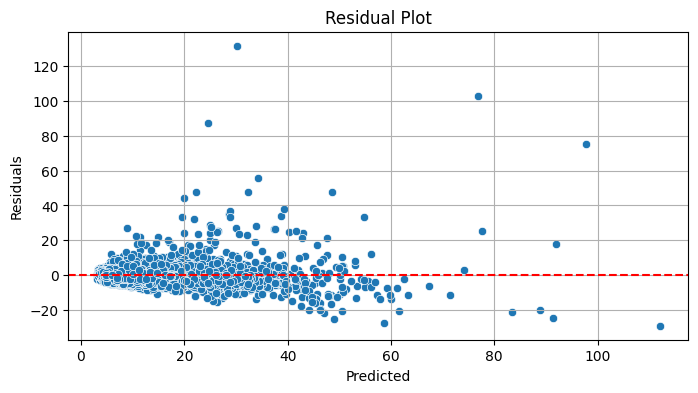

In [ ]:
residuals = y_val - y_pred
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


Prediction vs Actual Plot

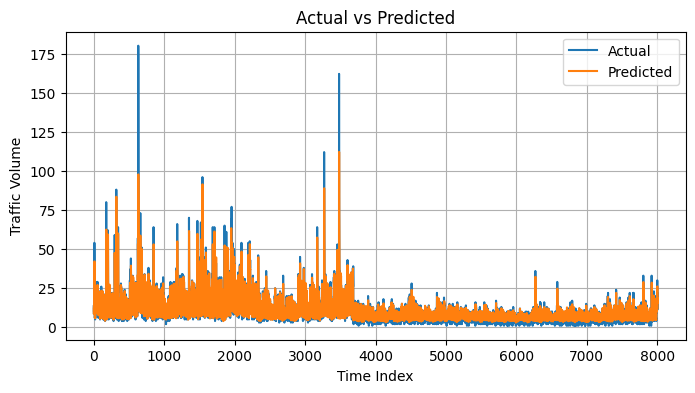

In [ ]:
plt.figure(figsize=(8, 4))
sns.lineplot(x=range(len(y_val)), y=y_val, label='Actual')
sns.lineplot(x=range(len(y_pred)), y=y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Time Index")
plt.ylabel("Traffic Volume")
plt.legend()
plt.grid(True)
plt.show()


 Error Distribution


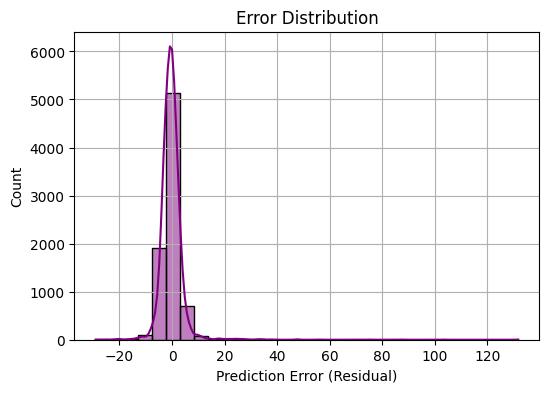

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Error Distribution")
plt.xlabel("Prediction Error (Residual)")
plt.grid(True)
plt.show()


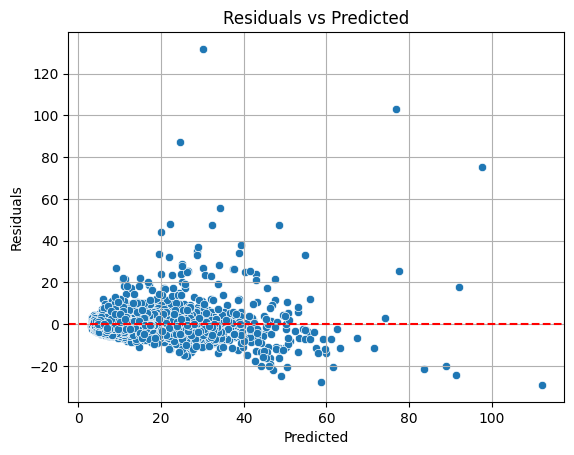

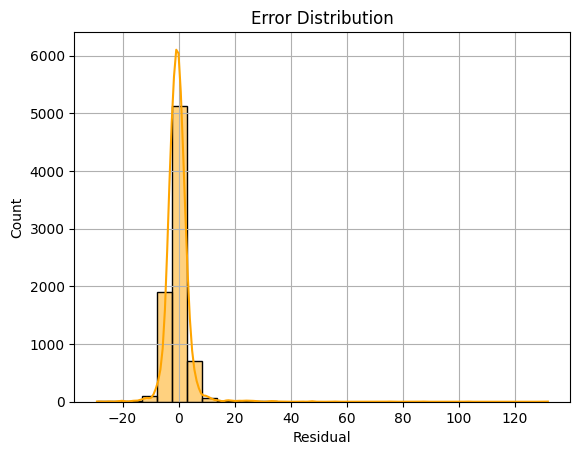

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

residuals = y_val - y_pred

# Residual vs Predicted
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Histogram of residuals
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title("Error Distribution")
plt.xlabel("Residual")
plt.grid(True)
plt.show()


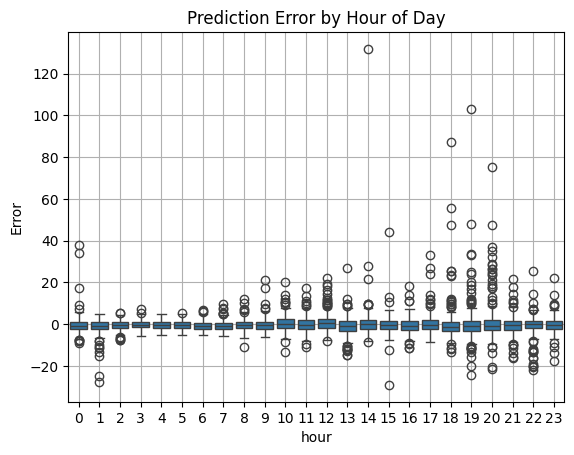

In [ ]:
# Add back predictions and residuals to validation set
val_df = X_val.copy()
val_df['Actual'] = y_val
val_df['Predicted'] = y_pred
val_df['Error'] = y_val - y_pred

# Check error patterns by hour
sns.boxplot(x=val_df['hour'], y=val_df['Error'])
plt.title("Prediction Error by Hour of Day")
plt.grid(True)
plt.show()


In [ ]:
# Create moving average of Vehicles
merged_df['rolling_mean_3h'] = merged_df['Vehicles'].rolling(window=3).mean()
merged_df['rolling_std_6h'] = merged_df['Vehicles'].rolling(window=6).std()

# Lag interaction
merged_df['lag_1h_temp'] = merged_df['lag_1h'] * merged_df['temperature']
merged_df.dropna(inplace=True)


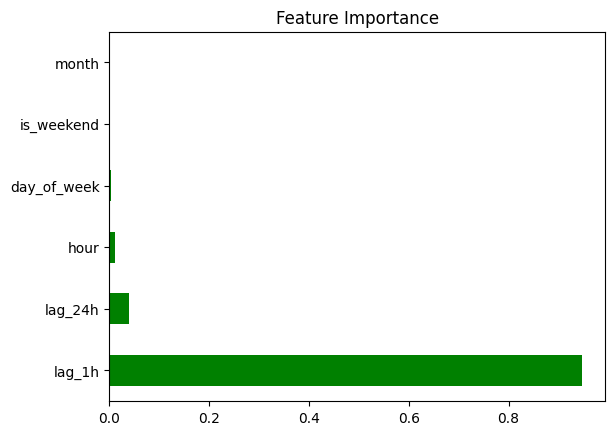

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='green')
plt.title("Feature Importance")
plt.show()


Drop features with low contribution

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)


Hyperparameter Tuning: RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'min_samples_split': randint(2, 10)
}

search = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_dist,
                            n_iter=30, cv=5, scoring='neg_root_mean_squared_error',
                            random_state=42, n_jobs=-1)

search.fit(X, y)
print("Best Params:", search.best_params_)
print("Best Score:", -search.best_score_)


Best Params: {'learning_rate': np.float64(0.05958008171890075), 'max_depth': 3, 'min_samples_split': 8, 'n_estimators': 108, 'subsample': np.float64(0.9316734307889971)}
Best Score: 4.612474360493681
